# Statistik-Labor Testat Aufgabe 4
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
In den Dateien **sr_aufg_4_xy_MR1.txt**, **sr_aufg_4_xy_MR 2.txt** und **sr_aufg_4_xy_MR3.txt**
(*xy = Endziffern Ihrer Matrikelnummer*) finden Sie drei verschiedene Messreihen.<br> 
Es soll jeweils untersucht werden, ob bei der Messreihe eine Normalverteilung vorliegt und falls ja, welche Normalverteilung in Frage kommt.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein.

In [1]:
import pandas as pd

data1 = pd.read_csv('sr_aufg_4_71_MR1.txt', delim_whitespace=True, decimal=',', header=None)
data2 = pd.read_csv('sr_aufg_4_71_MR2.txt', delim_whitespace=True, decimal=',', header=None)
data3 = pd.read_csv('sr_aufg_4_71_MR3.txt', delim_whitespace=True, decimal=',', header=None)

## 2. Kennzahlen bestimmen
Berechnen Sie für jeden der drei Messreihen **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite**.

***Beispiellösung:***<br>
Bitte geben Sie die Kennzahlen in tabellarischer Form ab.

In [2]:
# Calculate the required statistical measures for each dataset
statistics = {}

for label, data in {'MR1': data1, 'MR2': data2, 'MR3': data3}.items():
    mean = round(data.mean().values[0], 4)
    var = round(data.var(ddof=1).values[0], 4)
    std_dev = round(data.std(ddof=1).values[0], 4)
    median = round(data.median().values[0], 4)
    range = round(data.max().values[0] - data.min().values[0], 4)
    statistics[label] = {
        'Mittelwert': mean,
        'Empirische Varianz': var,
        'Empirische Standardabweichung': std_dev,
        'Median': median,
        'Spannweite': range
    }

statistics_df = pd.DataFrame(statistics).T
statistics_df

,Mittelwert,Empirische Varianz,Empirische Standardabweichung,Median,Spannweite
MR1,4.0517,5.5208,2.3496,4.2336,5.9971
MR2,829.9852,4.0937,2.0233,830.0015,9.9577
MR3,91.4013,0.1497,0.3870,91.2866,1.9934


## 3. Histogramme erstellen
Erstellen Sie für jeden der drei Messreihen ein Histogramm. <br>
Erläutern Sie hierzu auch die Wahl der Klassen: 
- Wie viele Klassen haben Sie gewählt (und warum diese Anzahl von Klassen)? 
- Wie haben Sie die Klassengrenzen festgelegt und warum? Welche Funktion haben Sie beim Auszählen benutzt?

***Beispiellösung:***<br>
Darstellung aller 3 Histogramme mit zusätzlich der Beantwortung der Fragen.

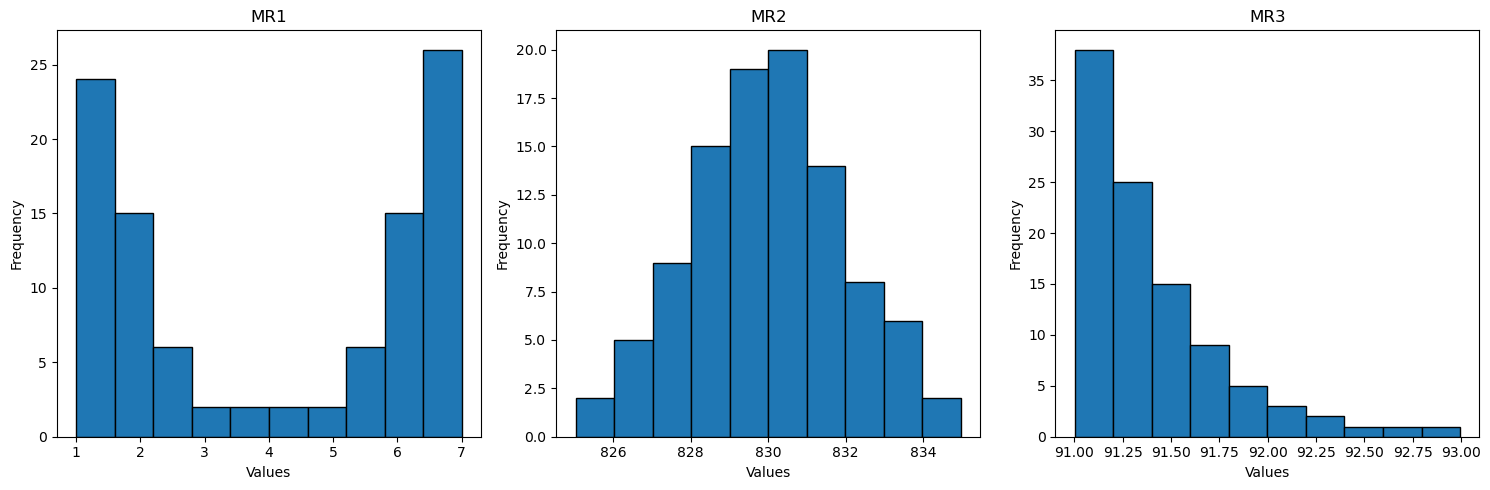

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def determine_bins(data):
    return int(round(len(data)**0.5))

bins_MR1 = determine_bins(data1)
bins_MR2 = determine_bins(data2)
bins_MR3 = determine_bins(data3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data1[0], bins=bins_MR1, edgecolor='black')
plt.title('MR1')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data2[0], bins=bins_MR2, edgecolor='black')
plt.title('MR2')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data3[0], bins=bins_MR3, edgecolor='black')
plt.title('MR3')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Ich habe 10 Klassen durch die Quadrawurzel der Anzahl der Datenpunkten jedes Datensatzes erhalten. Diese Wahl sorgt dafür, dass das Histogramm nicht zu grob ist, wodurch Details verborgen werden könnten. Auch nicht zu fein, wodurch die Werte zu komplex werden könnten.

Die Klassengrenzen wurden durch die die hist-Funktion von matplotlib festgelegt. Die Funktion teilt den Bereich der Daten gleich mäßig in die zuvor bestimmte Anzahl von Bins auf. Die Bins werden gleichmäßig verteilt und decken die gesamte Datenmenge ab. 

## 4. Normalverteilte Daten erkennen
Entscheiden Sie anhand des Histogramms für jede der drei Messreihen, ob eine Normalverteilung vorliegt. Begründen Sie Ihre Entscheidung.

MR2 zeigt deine Normalverteilung, da sie die Glockenform darstellt, die symmetrisch um den Mittelwert herum sind. Die Meisten Datenpuinkte sind in der Mitte konzentriert und die Häufigkeit zu den Rändern nehmen ab.

## 5. Dichtekurve der Normalverteilung einzeichnen
Sofern bei einer Messreihe eine Normalverteilung vorliegt, erstellen Sie ein weiteres Diagramm, das sowohl das Histogramm als auch die (an das Histogramm angepasste) Dichtekurve der passenden Normalverteilung zeigt.
- Welche Normalverteilungsdichte haben Sie gezeichnet, d. h., welche Werte haben Sie für die Parameter $\mu$ bzw. $\sigma$ eingesetzt?

***Beispiellösung*** (für den Fall, dass bei Messreihe MR1 eine Normalverteilung vorliegt):
<div>
<img src="https://drive.google.com/uc?id=1iVJQvjVW9mvBWJ_V3a4rUMJ-fdgbzqg4" width="500"/>
</div>

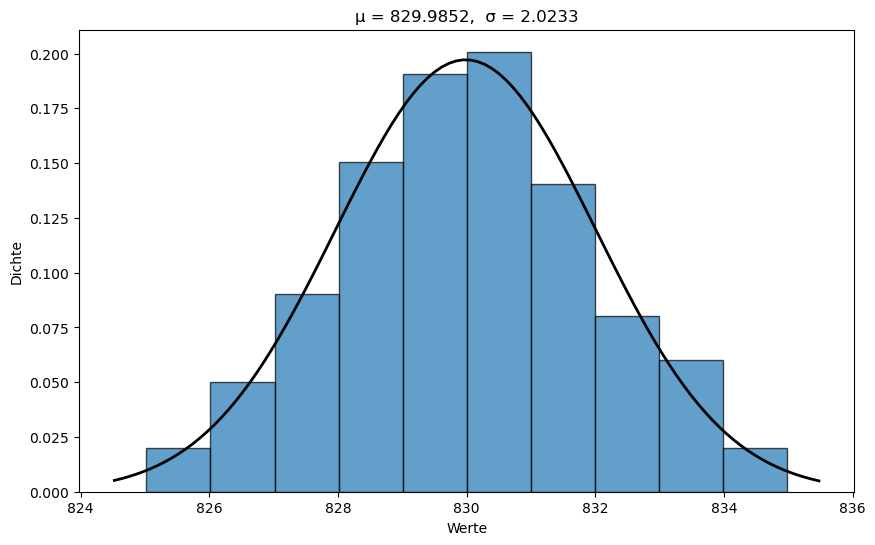

In [4]:
from scipy.stats import norm

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data2[0], bins=determine_bins(data2), density=True, edgecolor='black', alpha=0.7)

mean2 = data2[0].mean()
std_dev2 = data2[0].std(ddof=1)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean2, std_dev2)
plt.plot(x, p, 'k', linewidth=2)

title = f"μ = {mean2:.4f},  σ = {std_dev2:.4f}"
plt.title(title)
plt.xlabel('Werte')
plt.ylabel('Dichte')

plt.show()


Für die Dichtekurve der Normalverteilung in das Histogramm MR2 habe ich für μ den Mittelwert und für σ die Standardabweichung des Datensatzes verwendet.

## 6. Erläuterungen zur Dichtekurve
Erläutern Sie zu dem bei 5. gezeichneten Diagramm:
- Um welchen Faktor unterscheiden sich die im Histogramm dargestellten Anzahlen von den Funktionswerten der Normalverteilungsdichte?
- Wie haben Sie diesen Faktor bei der Erstellung des Diagramms berücksichtigt? Mussten Sie die Skalierung der y-Achse(n) ändern? Wenn ja, wie? Wenn nein, warum nicht?

Die im Histogramm dargestellten Anzahlen sind absolute Häufigkeiten, während die Funktionswerte der Normalverteilungsdichte Wahrscheinlichkeitsdichten sind. Die Rechnung erfolgt durch Division der absoluten Häufigkeiten durch die Gesamtanzahl der Beobachtungen und die Breite der Bins(Klassen).

Bei der Erstellung des Diagramms wurde das Histogramm mit der Option 'density=True' skaliert. Dadurch werden die Summen der Flächen aller Bins 1, wodurch dieser direkt mit der Dichtekurve der Normalverteilung vergleicht werden kann.
Die Skalierung der Y-Achse wurde geändert, indem das Histogramm auf Dichte skaliert wurde. Dadurch wird die y-Achse auf Wahrscheinlichkeitsdichten anstelle von absoluten Häufigkeiten skaliert. Ohne dieses würde die Dichtekurve nicht korrekt über das Histogramm liegen.